In [98]:
import pandas as pd
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt

df =  sns.load_dataset("titanic")

342 People survived from the accident. 891 people were on the ship


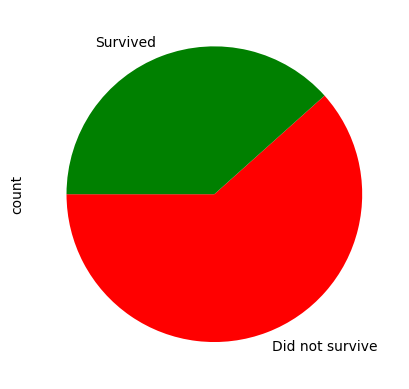

In [99]:
# How many survived?
df_survived = df.value_counts("survived")
df_survived = df_survived.set_axis(["Did not survive","Survived"])
df_allpeople = len(df)
print("{} People survived from the accident. {} people were on the ship".format(df_survived.iloc[1],df_allpeople))
s = df_survived.plot(kind = "pie",startangle = 180,colors = ["red","green"])

0.74 is the rate of women survived. 233 women survived 314 were on the ship
0.19 is the rate of men survived 109 men survived 577 were on the ship


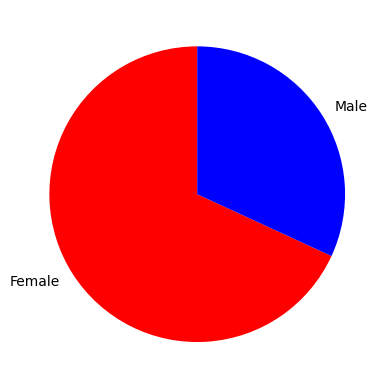

In [100]:
# What is the rate of women survived?
df_fsurvived_count = len(df[(df["sex"] == "female") & (df["survived"] == 1)])
df_female_count = len(df[df["sex"] == "female"])
df_msurvived_count = len(df[(df["sex"] == "male") & (df["survived"] == 1)])
df_male_count = len(df[df["sex"] == "male"])
print("{:.2f} is the rate of women survived. {} women survived {} were on the ship".format(df_fsurvived_count/df_female_count,df_fsurvived_count,df_female_count))
print("{:.2f} is the rate of men survived {} men survived {} were on the ship".format(df_msurvived_count/df_male_count,df_msurvived_count,df_male_count))
df_gender_survived = pd.Series([df_fsurvived_count,df_msurvived_count],index = ["Female","Male"])
k = df_gender_survived.plot(kind = "pie",colors = ["red","blue"],startangle = 90)

"20-30" age group survived the most with 84 people.


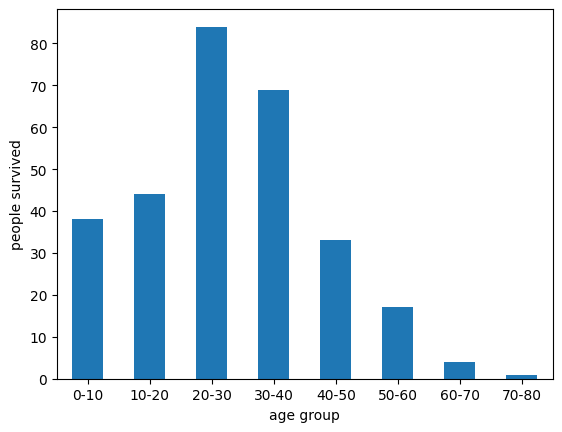

In [101]:
# Which age range has survived the most?
bins = [0,10,20,30,40,50,60,70,80]
labels = ["0-10","10-20","20-30","30-40","40-50","50-60","60-70","70-80"]
df["age group"] = pd.cut(df["age"],bins=bins,labels=labels)
df_agegroups_survived = df[df["survived"] == 1].value_counts("age group").sort_values(ascending=False)
age_group = df_agegroups_survived.index[0]
survived = df_agegroups_survived.iloc[0]
print("\"{}\" age group survived the most with {} people.".format(age_group,survived))
barplot_agegroups = df_agegroups_survived.sort_index().plot(kind = "bar",rot = 0,ylabel = "people survived")




20-30 age group survived the most from females with 61 people.
20-30 and 30-40 age group survived the most from males with 23 people.


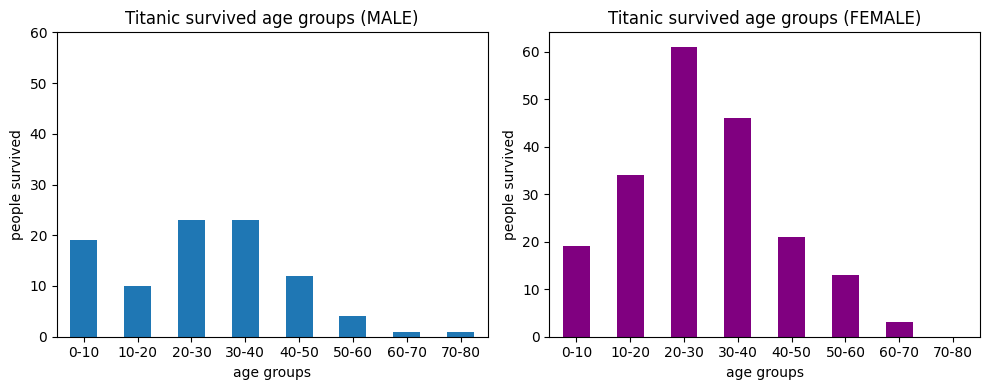

In [104]:
# Which age range and gender has survived the most?

df_agegroups_female_survived = df[(df["survived"] == 1) & (df["sex"] == "female")].value_counts("age group").sort_index()
df_agegroups_male_survived = df[(df["survived"] == 1) & (df["sex"] == "male")].value_counts("age group").sort_index()
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))  # 1 row, 2 columns


df_agegroups_male_survived.plot(kind = "bar",ylabel = "people survived",rot = 0,xlabel = "age groups",title = "Titanic survived age groups (MALE)",ylim = [0,60], ax= ax1)
df_agegroups_female_survived.plot(kind = "bar",ylabel = "people survived",rot = 0,xlabel = "age groups",title = "Titanic survived age groups (FEMALE)",color = "purple",ax = ax2)
plt.tight_layout()

print("{} age group survived the most from females with {} people.".format(df_agegroups_female_survived.sort_values(ascending=False).index[0],df_agegroups_female_survived.sort_values(ascending=False).iloc[0]))
print("{} and {} age group survived the most from males with {} people.".format(df_agegroups_male_survived.sort_values(ascending=False).index[1],df_agegroups_male_survived.sort_values(ascending=False).index[0],df_agegroups_male_survived.sort_values(ascending=False).iloc[0]))


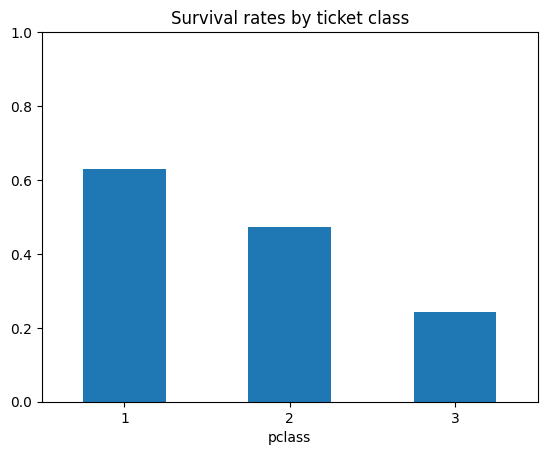

In [ ]:
# What were the survival rates by ticket class?

df_pclass_survived = df[df["survived"] == 1].value_counts("pclass")
df_pclass_counts = df.value_counts("pclass")
df_survival_rates = df_pclass_survived/df_pclass_counts
df_survival_rates_plot = df_survival_rates.plot(kind= "bar",ylim = [0,1],rot = 0,title = "Survival rates by ticket class")

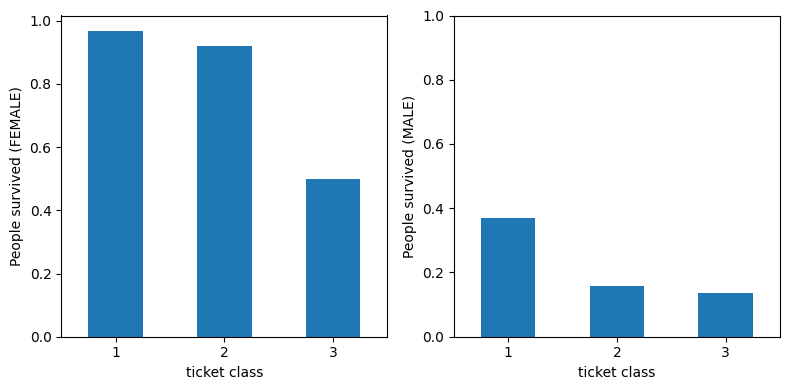

In [ ]:
# How did the proportions of men and women differ in each class?

# Men
df_pclass_male_survived = df[(df["survived"] == 1) & (df["sex"] == "male")].value_counts("pclass")
df_pclass_male_counts = df[df["sex"] == "male"].value_counts("pclass")
df_pclass_male_survival_rates = df_pclass_male_survived / df_pclass_male_counts
df_pclass_male_survival_rates = df_pclass_male_survival_rates.sort_index()

# Women
df_pclass_female_survived = df[(df["survived"] == 1) & (df["sex"] == "female")].value_counts("pclass")
df_pclass_female_counts = df[df["sex"] == "female"].value_counts("pclass")
df_pclass_female_survival_rates = df_pclass_female_survived / df_pclass_female_counts
df_pclass_female_survival_rates = df_pclass_female_survival_rates.sort_index()

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(8,4))  # 1 row, 2 columns
df_pclass_female_survival_rates.plot(kind="bar",rot = 0,xlabel = "ticket class",ylabel = "People survived (FEMALE)",ax=ax1)
df_pclass_male_survival_rates.plot(kind ="bar",ylim = [0,1],rot = 0,xlabel = "ticket class",ylabel = "People survived (MALE)",ax=ax2)
plt.tight_layout()


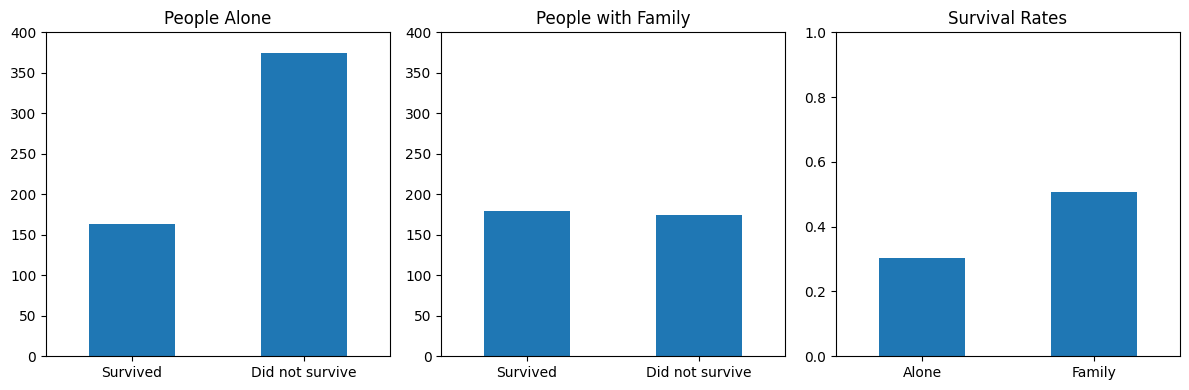

In [ ]:
# Were those who came alone or with family luckier?

df_alone = df[df["alone"] == True].value_counts("survived").sort_index(ascending = False)
df_alone = df_alone.set_axis(["Survived","Did not survive"])
df_family = df[df["alone"] == False].value_counts("survived").sort_index(ascending = False)
df_family = df_family.set_axis(["Survived","Did not survive"])
df_rates = pd.Series([df_alone.iloc[0]/(df_alone.iloc[0] + df_alone.iloc[1]),df_family.iloc[0]/(df_family.iloc[0] + df_family.iloc[1])],index = ["Alone","Family"])

fig , (ax1,ax2,ax3) = plt.subplots(1,3,figsize = (12,4))
df_alone.plot(kind = "bar",xlabel = "",title = "People Alone",rot = 0,ylim = [0,400],ax = ax1)
df_family.plot(kind = "bar",xlabel = "",title = "People with Family",rot = 0,ylim = [0,400],ax = ax2)
df_rates.plot(kind = "bar",title = "Survival Rates",ylim = [0,1],rot = 0,ax = ax3)
plt.tight_layout()